# Image Classification

### Leveraging ResNet50 Architecture for Multi-Class Classification

Aim: This experiment aims to apply the ResNet50 architecture to multi-class classification. ResNet50, known for its exceptional performance in image classification tasks, will serve as the foundation for the model. I will begin by establishing a baseline model and subsequently customise the ResNet50 architecture based on the performance of my dataset on the baseline model.

Dataset: The dataset comprises 20 classes representing various bird and dog breeds.

Below are the steps performed:
1. Importing Necessary Packages
2. Unzipping the Dataset
3. Data Splitting
4. Setting up Image Data Generators
5. Visualization of Training Dataset
6. ResNet50 Architecture
7. Baseline Model
6. Customized Model

### 1. Importing neccesary packages

In [2]:
import os  # For os operations
import pandas as pd
import numpy as np
import zipfile

# TensorFlow and Keras imports
import tensorflow as tf  # Main library
from tensorflow.keras import layers  # Layer building
from tensorflow.keras import Model  # Model definition
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Image augmentation and preprocessing

import cv2 # OpenCV
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt

In [3]:
!pwd

/root/AT2/Image_classification


### 2. Unzipping the Dataset

In [4]:
!unzip /root/AT2/dataset/dataset_42028assg2_14360820.zip 'Image_Classification/dataset_14360820/*' -d /root/AT2/dataset/


Archive:  /root/AT2/dataset/dataset_42028assg2_14360820.zip
   creating: /root/AT2/dataset/Image_Classification/dataset_14360820/
   creating: /root/AT2/dataset/Image_Classification/dataset_14360820/BLACK THROATED WARBLER/
   creating: /root/AT2/dataset/Image_Classification/dataset_14360820/BLUE GROSBEAK/
   creating: /root/AT2/dataset/Image_Classification/dataset_14360820/Brabancon_griffon/
   creating: /root/AT2/dataset/Image_Classification/dataset_14360820/COMMON LOON/
   creating: /root/AT2/dataset/Image_Classification/dataset_14360820/CRESTED CARACARA/
   creating: /root/AT2/dataset/Image_Classification/dataset_14360820/GLOSSY IBIS/
   creating: /root/AT2/dataset/Image_Classification/dataset_14360820/Gordon_setter/
   creating: /root/AT2/dataset/Image_Classification/dataset_14360820/Great_Dane/
   creating: /root/AT2/dataset/Image_Classification/dataset_14360820/LAUGHING GULL/
   creating: /root/AT2/dataset/Image_Classification/dataset_14360820/PHILIPPINE EAGLE/
   creating: /root

### 3. Data Splitting

In [14]:
!pip install split-folders

  Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.


In [15]:
import splitfolders

# Path to the directory with images
input_folder = '/root/AT2/Image_classification/dataset/Image_Classification/dataset_14360820/'  

# Path to the directory for the split folders
output_folder = '/root/AT2/Image_classification/dataset/'  

# Splitting with a ratio of 70% training, 15% validation, and 15% test
splitfolders.ratio(input_folder, output=output_folder, seed=14360820, ratio=(.7, .15, .15), group_prefix=None)  


Copying files: 3106 files [01:18, 39.41 files/s]


In [3]:
# Paths to directories
#source_dir = '/root/AT2/dataset/Image_Classification/dataset_14360820/'
train_dir = '/root/AT2/Image_classification/dataset/train'
val_dir = '/root/AT2/Image_classification/dataset/val'
test_dir = '/root/AT2/Image_classification/dataset/test'

### 4. Setting up Image Data Generators 

Data generators are configured here for training and validation data. They facilitate the streamlined loading and preprocessing of data in batches during model training.

In addition to configuring data generators for training and validation data, a test data generator is also loaded to streamline the loading and preprocessing of test data during model evaluation.

Normalization is applied to the training, validation and testing data in this setup.

However, no data augmentation is implemented fon training dataset for the Baseline model.

In [4]:
# Performing normalization
train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
# Loading and preprocessing training data
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224),  # resized to 224 x 224 
    batch_size=32,  # Number of images to process at a time
    class_mode='categorical',
    shuffle=True) 

Found 2167 images belonging to 20 classes.


In [6]:
# Loading and preprocessing validation data
validation_generator = val_datagen.flow_from_directory(
    val_dir,  
    target_size=(224, 224),  
    batch_size=32, 
    class_mode='categorical',
    shuffle=False)  

Found 455 images belonging to 20 classes.


In [7]:
test_dir = '/root/AT2/Image_classification/dataset/test'
test_datagen = ImageDataGenerator(rescale=1./255)
# Loading and preprocessing testing data for model evaluation
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode='categorical',
    shuffle=False)

Found 484 images belonging to 20 classes.


### 5. Visualization of Training Dataset

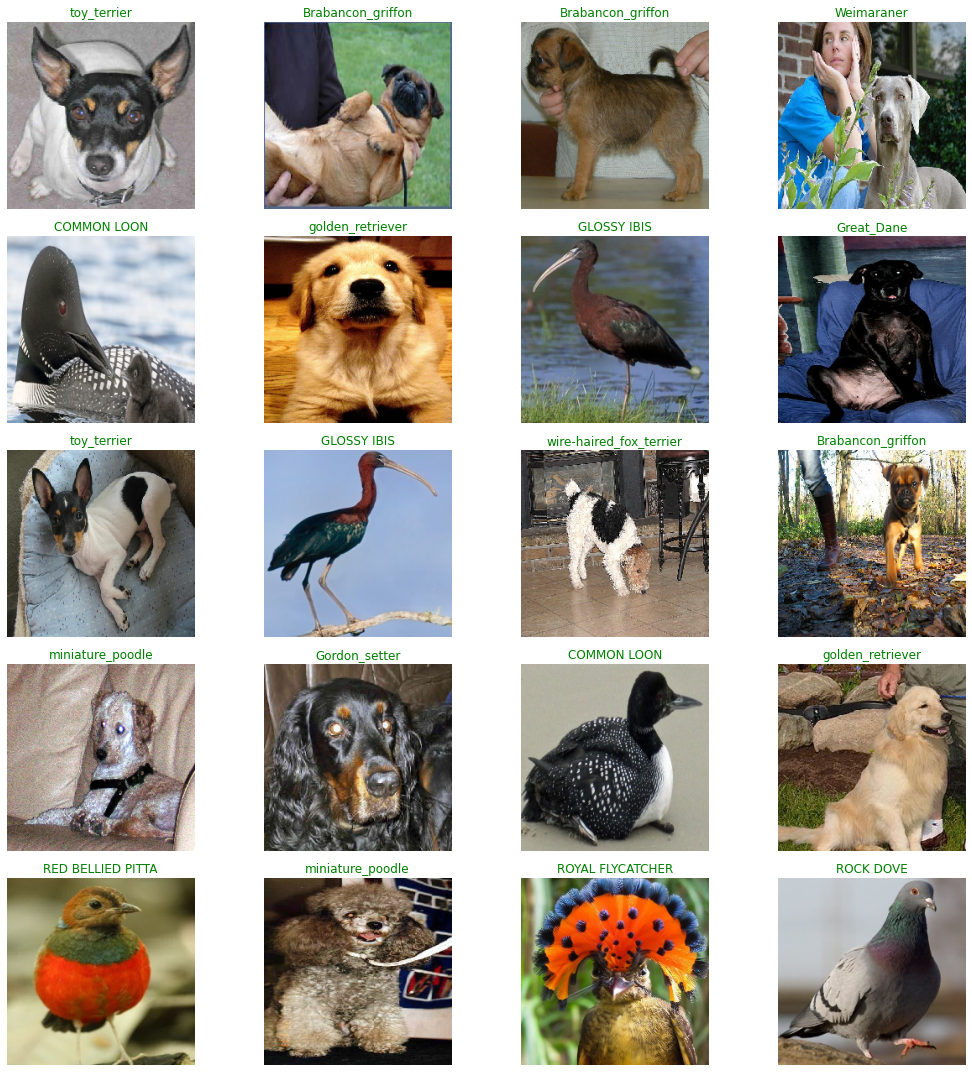

In [11]:
# Creating a dictionary mapping class indices to class labels
class_index_to_label = {index: label for label, index in train_generator.class_indices.items()}

# Get a batch of images and labels from the generator
batch_images, batch_labels = next(train_generator)

# Plotting the images in a grid of 4 columns and 5 rows
fig, ax_array = plt.subplots(5, 4, figsize=(15, 15))
ax_array = ax_array.flatten()

# Iterate through each image and label in the batch
for index, ax in enumerate(ax_array):
    img = batch_images[index]
    ax.imshow(img)
    ax.axis('off')

    # Get class index from one-hot label
    label_index = batch_labels[index].argmax()  # Index of the maximum value in the one-hot encoded label
    # Get the corresponding class label from the dictionary
    class_label = class_index_to_label[label_index]
    ax.set_title(class_label, color='green')  # Display the class label as the title

plt.tight_layout()
plt.show()


### 6. ResNet50 Architecture

In [166]:
# Importing necessary libraries
import numpy as np
from tensorflow.keras.applications import ResNet50 # Pre-trained ResNet50 model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


#### 6.1  Baseline Model

In [167]:
# Loading pre-trained ResNet50 model without including the top layers
baseline_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [168]:
# Setting each layer in the baseline model as trainable
for layer in baseline_model.layers:
    layer.trainable = True

In [169]:
# Adding custom head
x = GlobalAveragePooling2D()(baseline_model.output)
x = layers.Dense(1024, activation='relu')(x)
predictions = Dense(20, activation='softmax')(x)

In [170]:
# Creating model combining the base ResNet50 and custom head
resnet50_baseline_model = Model(inputs=baseline_model.input, outputs=predictions)

##### Model Summary

In [171]:
# Displaying model summary
resnet50_baseline_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In the chosen baseline model, ResNet50, the architecture comprises a total of 25,706,388 parameters. By configuring all layers as trainable, 25,653,268 parameters are designated for training, allowing for their adjustment during the training process.
However, a subset of parameters, totalling 53,120, remains non-trainable. These parameters originate from the ImageNet weights initialising the ResNet50 baseline model. As these weights are specifically optimised for image classification tasks on the ImageNet dataset, they are preserved without updates during training.
The custom dataset for training consists of 20 classes to align the model for this classification task.

##### Model Compilation

The model utilizes categorical crossentropy loss for 20 classes. For optimization, Adam optimizer with a learning rate of 0.0001 is used to optimize the model parameters efficiently during training.

In [172]:
resnet50_baseline_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['acc']
)

Checkpointing

Saving the snapshot of model as checkpoint

In [173]:
# Setup the ModelCheckpoint callback
filepath_base = 'root/AT2/Image_classification/baseline_resnet50_weights.epoch_{epoch:02d}-loss_{val_loss:.2f}.hdf5'
checkpoint_base = tf.keras.callbacks.ModelCheckpoint(
    filepath_base,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch'
)

In [174]:
# Printing the number of training and validation samples
print("Total number of training samples: ", train_generator.samples)
print("Total number of validation samples: ", validation_generator.samples)

Total number of training samples:  2167
Total number of validation samples:  455


##### Model Training 

In [175]:
history = resnet50_baseline_model.fit(
    train_generator,
    steps_per_epoch= 68, #train_generator.samples // train_generator.batch_size
    epochs=30,
    validation_data=validation_generator,
    validation_steps= 15, #validation_generator.samples // validation_generator.batch_size
    callbacks=[checkpoint_base], 
    verbose=2)

Epoch 1/30
68/68 - 28s - loss: 0.7092 - acc: 0.8140 - val_loss: 6.0087 - val_acc: 0.0571

Epoch 00001: val_loss improved from inf to 6.00874, saving model to root/AT2/Image_classification/baseline_resnet50_weights.epoch_01-loss_6.01.hdf5
Epoch 2/30
68/68 - 23s - loss: 0.0714 - acc: 0.9778 - val_loss: 9.5861 - val_acc: 0.0571

Epoch 00002: val_loss did not improve from 6.00874
Epoch 3/30
68/68 - 23s - loss: 0.0175 - acc: 0.9968 - val_loss: 10.8189 - val_acc: 0.0571

Epoch 00003: val_loss did not improve from 6.00874
Epoch 4/30
68/68 - 23s - loss: 0.0035 - acc: 1.0000 - val_loss: 11.4576 - val_acc: 0.0571

Epoch 00004: val_loss did not improve from 6.00874
Epoch 5/30
68/68 - 23s - loss: 0.0022 - acc: 0.9995 - val_loss: 10.4558 - val_acc: 0.0571

Epoch 00005: val_loss did not improve from 6.00874
Epoch 6/30
68/68 - 23s - loss: 0.0031 - acc: 0.9995 - val_loss: 9.0949 - val_acc: 0.0571

Epoch 00006: val_loss did not improve from 6.00874
Epoch 7/30
68/68 - 23s - loss: 0.0054 - acc: 0.9982 - 

##### Model Evaluation

In [176]:
# Load the best saved model
saved_model_path = 'root/AT2/Image_classification/baseline_resnet50_weights.epoch_18-loss_0.25.hdf5'
baseline_best_model = tf.keras.models.load_model(saved_model_path)

# Evaluate the model on the test set
test_loss, test_accuracy = baseline_best_model.evaluate(test_generator)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

16/16 [==============================] - 3s 137ms/step - loss: 0.2667 - acc: 0.9215
Test Loss: 0.26670295000076294
Test Accuracy: 0.9214876294136047


##### Classified Images from Test Set on Baseline Model

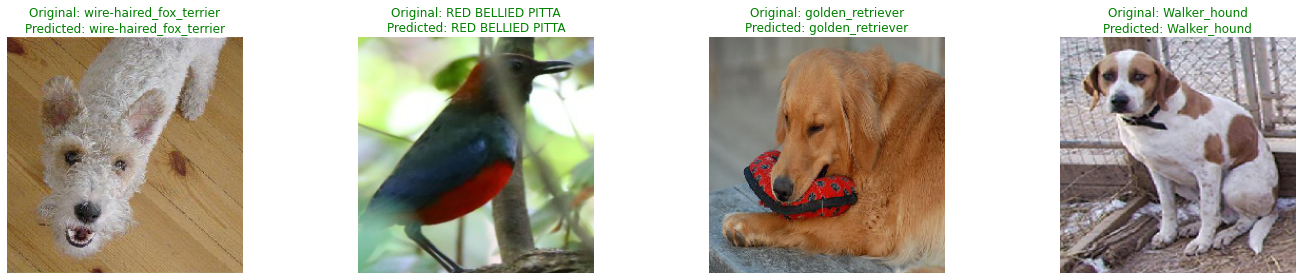

In [9]:
# Creating a dictionary mapping class indices to class labels
class_index_to_label = {index: label for label, index in test_generator.class_indices.items()}

# Randomly select a few images from the test generator
num_images_to_display = 4
random_indices = np.random.choice(len(test_generator), size=num_images_to_display, replace=False)

# Plotting the randomly selected images
fig, ax_array = plt.subplots(1, num_images_to_display, figsize=(20, 4))

for i, idx in enumerate(random_indices):
    # Get the image and label from the test generator
    batch_images, batch_labels = test_generator[idx]
    # Make predictions on the batch of images
    predictions = baseline_best_model.predict(batch_images)
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Select a random image from the batch
    random_image_idx = np.random.randint(len(batch_images))
    img = batch_images[random_image_idx]
    ax_array[i].imshow(img)
    ax_array[i].axis('off')

    # Get the original and predicted labels for the randomly selected image
    original_label_index = np.argmax(batch_labels[random_image_idx])
    original_class_label = class_index_to_label[original_label_index]
    
    predicted_label_index = predicted_labels[random_image_idx]
    predicted_class_label = class_index_to_label[predicted_label_index]

    ax_array[i].set_title(f"Original: {original_class_label}\nPredicted: {predicted_class_label}", color='green')  # Display the labels as the title

plt.tight_layout()
plt.show()

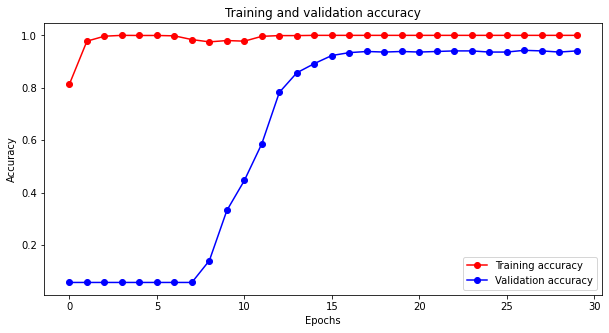

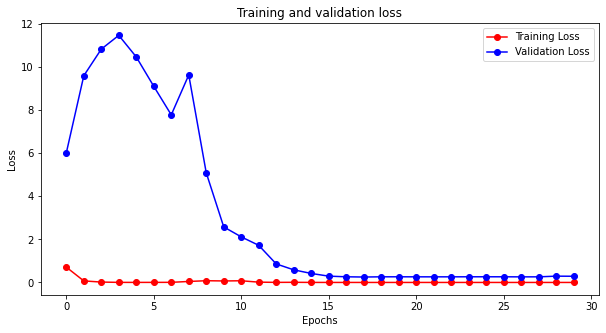

In [179]:
# Extracting training and validation accuracy and loss from history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot for training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, color='red', marker='o', linestyle='-', label='Training accuracy')
plt.plot(epochs, val_acc, color='blue', marker='o', linestyle='-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend()  
plt.show()  

# Plot for training and validation loss
plt.figure(figsize=(10, 5))  
plt.plot(epochs, loss, color='red', marker='o', linestyle='-', label='Training Loss')
plt.plot(epochs, val_loss, color='blue', marker='o', linestyle='-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()  
plt.show()  


From the plots above it is clear that

The model's training process indicates overfitting, with the training accuracy reaching near-perfect levels (100% accuracy) while the validation accuracy stagnates at a much lower rate for the initial epochs. However, during testing, the model performs well, achieving a test accuracy of approximately 92.15% and a test loss of 0.2667.
This suggests that despite the overfitting observed during training (as when the training loss was decreasing, validation loss increased) the model demonstrates robust generalisation capabilities, accurately classifying unseen test data. which is due to the residual networks in ResNet50. Another reason being, initializing the weights with ImageNet weights which consists of somewhat similar categories of images to the training dataset.
However, the model is very complex so I will simply the archtitecture and tackle the problem of overfitting during training.

The Observed overfitting is primarily due to the complexity of the ResNet50 model. Also, given the substantial data requirements of neural network models like ResNet50 for effective training, data augmentation becomes necessary here.

Next Steps: 
1. Data augmentation techniques will be employed to augment the training data.
2. The model architecture will be simplified.
3. Regularization Techniques like L2 regularization and dropout will be applied to regulate the model's complexity and enhance generalization.

#### Data Augmentation

In [144]:
# Defining data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [145]:
# Creating a training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224),  # resized to 224 x 224 
    batch_size=32,  # Number of images to process at a time
    class_mode='categorical',
    shuffle=True) 

Found 2167 images belonging to 20 classes.


#### 6.2 Customized Model

Simplifying the Architecture

In [146]:
from tensorflow.keras import layers, Model, callbacks
from tensorflow.keras.applications import ResNet50

# Load pre-trained ResNet50 model without including the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


Removing stage 5 (which includes several convolutional blocks and pooling layers) and from Stage 4, retaining layers till block 2-2 from ResNet50 Architecture to simplify the model.

In [147]:
# Index of the layer before the removal point
index_of_layer_before_removal = None
for i, layer in enumerate(base_model.layers):
    if 'conv4_block2_2_relu' in layer.name:
        index_of_layer_before_removal = i
        break

# Creating a new model excluding layers after the removal point.
if index_of_layer_before_removal is not None:
    resnet50_custom = Model(inputs=base_model.input, outputs=base_model.layers[index_of_layer_before_removal].output)
else:
    print("Layer before the removal point not found.")

In [148]:
# Setting each layer as trainable
for layer in resnet50_custom.layers:
    layer.trainable = True

##### Modifications done to reduce overfitting:
L2 regularization (lambda=0.45) is applied to the dense layer's weights.
Dropout with a rate of 0.65 randomly sets input units to zero during training to prevent overfitting followed by BatchNormalization to improve generalization capabilities of the model.

In [149]:
# Importing l2 regularization function
from tensorflow.keras.regularizers import l2  
# Definig custom head
x = GlobalAveragePooling2D()(resnet50_custom.output)
x = layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.45))(x) #L2 Regularization
x = layers.Dropout(0.65)(x)  # Dropout
x = layers.BatchNormalization()(x)
predictions = layers.Dense(20, activation='softmax')(x)

In [150]:
# Creating a new model combining the base ResNet50 and custom head
resnet50_modified = Model(inputs=resnet50_custom.input, outputs=predictions)

##### Model Summary

In [151]:
resnet50_modified.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

##### Model Compilation

The model utilizes categorical crossentropy loss for 20 classes. For optimization, Adam optimizer with a learning rate of 0.0001 is used to optimize the model parameters efficiently during training.

In [180]:
resnet50_modified.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['acc']
)

In [153]:
# Setup the ModelCheckpoint callback
filepath = 'root/AT2/Image_classification/resnet50_weights.epoch_{epoch:02d}-loss_{val_loss:.2f}.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch'
)

##### Model Training

In [154]:
# Train the model
history = resnet50_modified.fit(
    train_generator,
    steps_per_epoch=68,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=15,
    callbacks=[checkpoint],  # Adding checkpoint
    verbose=2
)

Epoch 1/100
68/68 - 30s - loss: 163.5515 - acc: 0.1620 - val_loss: 141.3151 - val_acc: 0.0571

Epoch 00001: val_loss improved from inf to 141.31512, saving model to root/AT2/Image_classification/resnet50_weights.epoch_01-loss_141.32.hdf5
Epoch 2/100
68/68 - 27s - loss: 121.9409 - acc: 0.3982 - val_loss: 105.8967 - val_acc: 0.0571

Epoch 00002: val_loss improved from 141.31512 to 105.89673, saving model to root/AT2/Image_classification/resnet50_weights.epoch_02-loss_105.90.hdf5
Epoch 3/100
68/68 - 27s - loss: 90.4200 - acc: 0.5551 - val_loss: 78.9030 - val_acc: 0.0571

Epoch 00003: val_loss improved from 105.89673 to 78.90305, saving model to root/AT2/Image_classification/resnet50_weights.epoch_03-loss_78.90.hdf5
Epoch 4/100
68/68 - 27s - loss: 66.3885 - acc: 0.6668 - val_loss: 58.6657 - val_acc: 0.0571

Epoch 00004: val_loss improved from 78.90305 to 58.66567, saving model to root/AT2/Image_classification/resnet50_weights.epoch_04-loss_58.67.hdf5
Epoch 5/100
68/68 - 27s - loss: 48.3702

##### Model Evaluation

In [155]:
# Load the best saved model
saved_model_path = 'root/AT2/Image_classification/resnet50_weights.epoch_93-loss_0.39.hdf5'
best_model = tf.keras.models.load_model(saved_model_path)

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(test_generator)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

16/16 [==============================] - 3s 139ms/step - loss: 0.5121 - acc: 0.9091
Test Loss: 0.5121297836303711
Test Accuracy: 0.9090909361839294


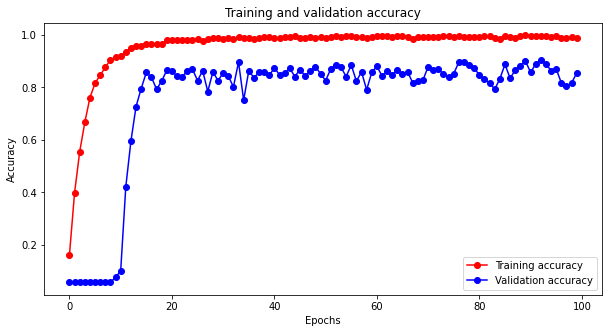

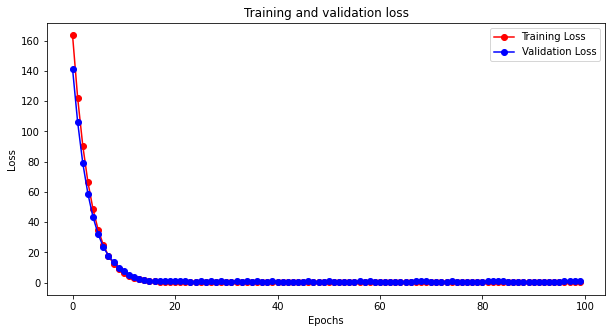

In [156]:
# Extracting training and validation accuracy and loss from history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot for training and validation accuracy
plt.figure(figsize=(10, 5)) 
plt.plot(epochs, acc, color='red', marker='o', linestyle='-', label='Training accuracy')
plt.plot(epochs, val_acc, color='blue', marker='o', linestyle='-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')  
plt.legend() 
plt.show()  

# Plot for training and validation loss
plt.figure(figsize=(10, 5)) 
plt.plot(epochs, loss, color='red', marker='o', linestyle='-', label='Training Loss')
plt.plot(epochs, val_loss, color='blue', marker='o', linestyle='-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()  

From the plots above:
The increase in training accuracy indicates that the model is effectively learning to classify the training data accurately. However, the validation accuracy, while generally improving, displays fluctuations. This discrepancy often occurs because the model, while learning from the training data, may overfit to some of its nuances or noise, but regularization causing fluctuations in its performance on the validation set.

Although both training and validation losses decrease over epochs, signifying the model's ability to minimize errors, the smaller size of the validation set compared to the training set can amplify the impact of noise or variability present in the data. Consequently, these fluctuations in validation accuracy are likely due to the limited representation of the validation set, which may not fully capture the diversity and complexity of the entire dataset.

##### Classified Images from Test Set on Customized Model

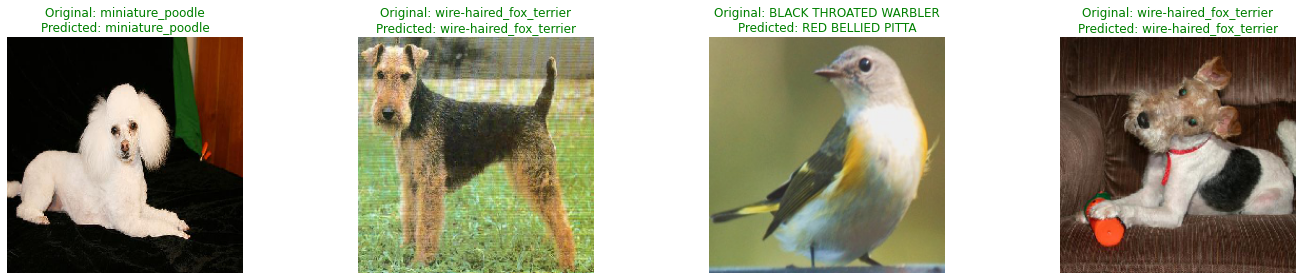

In [159]:
# Creating a dictionary mapping class indices to class labels
class_index_to_label = {index: label for label, index in test_generator.class_indices.items()}

# Randomly select a few images from the test generator
num_images_to_display = 4
random_indices = np.random.choice(len(test_generator), size=num_images_to_display, replace=False)

# Plotting the randomly selected images
fig, ax_array = plt.subplots(1, num_images_to_display, figsize=(20, 4))

for i, idx in enumerate(random_indices):
    # Get the image and label from the test generator
    batch_images, batch_labels = test_generator[idx]
    # Make predictions on the batch of images
    predictions = best_model.predict(batch_images)
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Select a random image from the batch
    random_image_idx = np.random.randint(len(batch_images))
    img = batch_images[random_image_idx]
    ax_array[i].imshow(img)
    ax_array[i].axis('off')

    # Get the original and predicted labels for the randomly selected image
    original_label_index = np.argmax(batch_labels[random_image_idx])
    original_class_label = class_index_to_label[original_label_index]
    
    predicted_label_index = predicted_labels[random_image_idx]
    predicted_class_label = class_index_to_label[predicted_label_index]

    ax_array[i].set_title(f"Original: {original_class_label}\nPredicted: {predicted_class_label}", color='green')  # Display the labels as the title

plt.tight_layout()
plt.show()
